## Análisis exploratorio de los datos disponibles sobre *AirBnb*

En la [web](http://insideairbnb.com/get-the-data.html) tenemos 7 archivos diferentes sobre los establecimientos AirBnb en Madrid.  Estos archivos son:
* listings.csv.gz 
* calendar.csv.gz 
* reviews.csv.gz
* listings.csv
* reviews.csv
* neighbourhoods.csv
* neighbourhoods.geojson

Los que tienen la extensión .gz son datos sin agrupar que vienen en formato comprimido mientras que los que no la tienen son datos agregados.  Los dos últimos tienen la función de geolocalizar los apartamentos en el mapa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [38]:
df = pd.read_csv('Data/Lisboa/listings.csv.gz',compression='gzip',low_memory=False)

In [39]:
#vemos la estructura de los datos 
df.shape

(22588, 106)

In [41]:
df.maxi.value_counts()

f    22588
Name: is_business_travel_ready, dtype: int64

In [4]:
#Todas las columnas están en minúsculas y no hay espacios
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24056,https://www.airbnb.com/rooms/24056,20190123134024,2019-01-23,Linda-a-Velha,NaN,A comfortable apartment with pool during the s...,A comfortable apartment with pool during the s...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,NaN
1,25659,https://www.airbnb.com/rooms/25659,20190123134024,2019-01-23,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Sunny Charming 1 Bedroom apar...,Charming sunny apartment in the heart of Alfam...,Heart of Alfama! Sunny Charming 1 Bedroom apar...,none,Alfama is the oldest and most picturesque quar...,...,t,f,moderate,f,f,1,1,0,0,1.66
2,26993,https://www.airbnb.com/rooms/26993,20190123134024,2019-01-23,Small nice apartment in the center,NaN,"Apartment for single or couple, 5 minutes walk...","Apartment for single or couple, 5 minutes walk...",none,this is one of the best neighborhoods in Lisbo...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.06
3,28066,https://www.airbnb.com/rooms/28066,20190123134024,2019-01-23,ear the birds,NaN,traditional farm house in a quiet place where ...,traditional farm house in a quiet place where ...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
4,29138,https://www.airbnb.com/rooms/29138,20190123134024,2019-01-23,Room for rent in shared house,NaN,"05 minutes from city center by subway, 10 minu...","05 minutes from city center by subway, 10 minu...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN


In [5]:
df.scrape_id.value_counts()

20190123134024    22588
Name: scrape_id, dtype: int64

In [6]:
#Pasamos a formato fecha la fecha en la que se hace scraping, ya que nos será útil luego
df['scrape_id'] = df.scrape_id.astype("object")
df['scrape_id'] = pd.to_datetime(df['scrape_id'],format="%Y%m%d%H%M%S")
#Comprobamos que el resultado está bien
df.scrape_id[0:4]

0   2019-01-23 13:40:24
1   2019-01-23 13:40:24
2   2019-01-23 13:40:24
3   2019-01-23 13:40:24
Name: scrape_id, dtype: datetime64[ns]

In [7]:
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

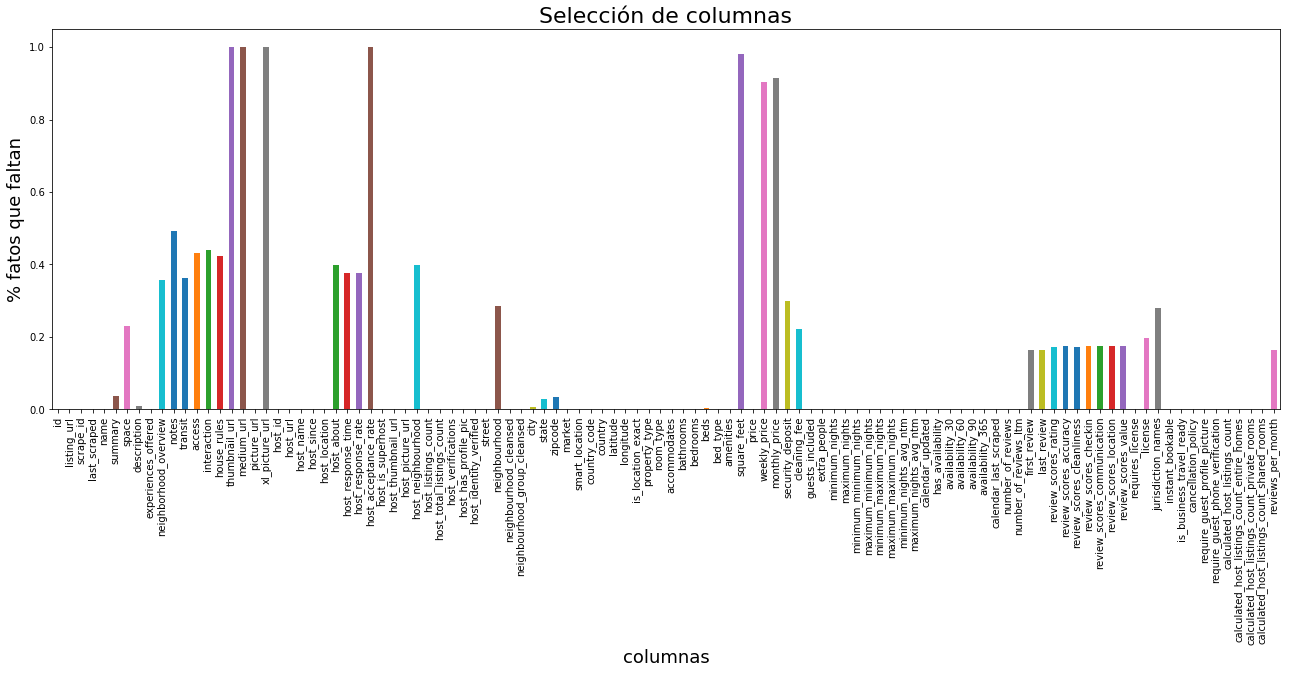

In [8]:
#El siguiente paso es realizar una selección de las columnas que aportan valor al análisis, 

missing = df.isnull().sum()/df.shape[0]
ax = missing.plot(kind='bar',figsize=(22,7))
ax.set_xlabel('columnas',fontsize=18)
ax.set_ylabel('% fatos que faltan',fontsize=18)
ax.set_title('Selección de columnas',fontsize=22)
plt.show()


In [9]:
#El primer criterio elegido para reducir el número de columnas es que contenga muchos nulos
borrar= missing.loc[missing > 0.3]
borrar


neighborhood_overview    0.357845
notes                    0.491766
transit                  0.361564
access                   0.430848
interaction              0.440942
house_rules              0.424163
thumbnail_url            1.000000
medium_url               1.000000
xl_picture_url           1.000000
host_about               0.399726
host_response_time       0.375686
host_response_rate       0.375686
host_acceptance_rate     1.000000
host_neighbourhood       0.397689
square_feet              0.980698
weekly_price             0.904241
monthly_price            0.915043
dtype: float64

In [10]:
df.jurisdiction_names.value_counts()

{Lisbon," Portugal"}    16282
Name: jurisdiction_names, dtype: int64

In [11]:
a_borrar = ['neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url'
           ,'medium_url','xl_picture_url','host_about','host_response_time','host_response_rate','host_acceptance_rate'
           ,'square_feet','weekly_price','monthly_price','security_deposit','license','jurisdiction_names']
df.drop(a_borrar,axis=1,inplace=True)


In [12]:
#Hemos pasado de 106 columnas a 87
df.shape

(22588, 87)

In [13]:
#Desglosamos las columnas por tipo
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22588 entries, 0 to 22587
Data columns (total 87 columns):
id                                              22588 non-null int64
listing_url                                     22588 non-null object
scrape_id                                       22588 non-null datetime64[ns]
last_scraped                                    22588 non-null object
name                                            22564 non-null object
summary                                         21741 non-null object
space                                           17381 non-null object
description                                     22394 non-null object
experiences_offered                             22588 non-null object
picture_url                                     22588 non-null object
host_id                                         22588 non-null int64
host_url                                        22588 non-null object
host_name                                    

In [14]:
#Separamos las columnas por el tipo en el que vienen dados, valoramos su utilidad y comprobamos que sea correcto
integers = df.columns[df.dtypes == 'int64']
df[integers].tail()

,id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
22583,31802507,85377682,1,1,1,1125,1,1,1125,1125,12,12,13,13,0,0,6,0,3,3
22584,31804815,238128073,4,2,2,1125,2,2,1125,1125,28,58,88,363,0,0,1,1,0,0
22585,31806055,238326078,5,1,1,1125,1,1,1125,1125,13,43,73,348,0,0,1,1,0,0
22586,31807120,231588194,5,3,2,1125,2,2,1125,1125,26,56,86,330,0,0,4,4,0,0
22587,31814321,22192546,6,1,2,1125,2,2,1125,1125,29,59,89,364,0,0,76,76,0,0


In [15]:
categoricas = df.columns[df.dtypes == 'object']
df[categoricas].head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,picture_url,host_url,host_name,...,calendar_updated,has_availability,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/24056,2019-01-23,Linda-a-Velha,NaN,A comfortable apartment with pool during the s...,A comfortable apartment with pool during the s...,none,https://a0.muscache.com/im/pictures/13693372/e...,https://www.airbnb.com/users/show/95163,Patrícia,...,never,t,NaN,NaN,t,f,f,strict_14_with_grace_period,f,f
1,https://www.airbnb.com/rooms/25659,2019-01-23,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Sunny Charming 1 Bedroom apar...,Charming sunny apartment in the heart of Alfam...,Heart of Alfama! Sunny Charming 1 Bedroom apar...,none,https://a0.muscache.com/im/pictures/5f20072a-4...,https://www.airbnb.com/users/show/107347,Ellie,...,today,t,2014-04-24,2018-11-09,t,t,f,moderate,f,f
2,https://www.airbnb.com/rooms/26993,2019-01-23,Small nice apartment in the center,NaN,"Apartment for single or couple, 5 minutes walk...","Apartment for single or couple, 5 minutes walk...",none,https://a0.muscache.com/im/pictures/150425/2e1...,https://www.airbnb.com/users/show/111686,Hans,...,4 months ago,t,2010-07-12,2018-07-04,t,f,f,strict_14_with_grace_period,f,f
3,https://www.airbnb.com/rooms/28066,2019-01-23,ear the birds,NaN,traditional farm house in a quiet place where ...,traditional farm house in a quiet place where ...,none,https://a0.muscache.com/im/pictures/156237/a3b...,https://www.airbnb.com/users/show/120855,Lucia,...,never,t,NaN,NaN,t,f,f,flexible,f,f
4,https://www.airbnb.com/rooms/29138,2019-01-23,Room for rent in shared house,NaN,"05 minutes from city center by subway, 10 minu...","05 minutes from city center by subway, 10 minu...",none,https://a0.muscache.com/im/pictures/162476/3c0...,https://www.airbnb.com/users/show/125304,Susana,...,never,t,NaN,NaN,t,f,f,flexible,f,f


In [16]:
#Importamos este código para poder ver todas las columnas
from IPython.display import display


pd.options.display.max_columns = None


In [17]:
df.guests_included.value_counts()

1     11212
2      7203
4      2341
3       610
6       549
5       281
8       151
10       93
7        42
12       29
16       27
9        17
14       16
11        6
15        6
13        4
26        1
Name: guests_included, dtype: int64

In [18]:
df[df.host_listings_count > 50]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
75,141883,https://www.airbnb.com/rooms/141883,2019-01-23 13:40:24,2019-01-23,Historical Cascais Apartment,Cozy studio in historical center of Cascais. D...,Studio situated in the historical part of Casc...,Cozy studio in historical center of Cascais. D...,none,https://a0.muscache.com/im/pictures/33c077dd-3...,688914,https://www.airbnb.com/users/show/688914,Luis,2011-06-11,"Cascais, Lisbon, Portugal",f,https://a0.muscache.com/im/users/688914/profil...,https://a0.muscache.com/im/users/688914/profil...,Alfama,63.0,63.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Cascais, Lisbon, Portugal",NaN,Cascais e Estoril,Cascais,Cascais,Lisbon,2750,Lisbon,"Cascais, Portugal",PT,Portugal,38.695795,-9.423035,t,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$52.00,$40.00,1,$0.00,2,1125,2,2,1125,1125,2.0,1125.0,today,t,29,59,89,299,2019-01-23,12,7,2012-07-08,2018-11-20,95.0,10.0,9.0,10.0,10.0,10.0,9.0,t,t,f,strict_14_with_grace_period,f,f,63,63,0,0,0.15
191,277126,https://www.airbnb.com/rooms/277126,2019-01-23 13:40:24,2019-01-23,Cascais Over The Bay Apartment. Beach and balc...,Premium location. Some steps away from the Cas...,"Renovated with excellent quality materials, th...",Premium location. Some steps away from the Cas...,none,https://a0.muscache.com/im/pictures/9426670/f3...,688914,https://www.airbnb.com/users/show/688914,Luis,2011-06-11,"Cascais, Lisbon, Portugal",f,https://a0.muscache.com/im/users/688914/profil...,https://a0.muscache.com/im/users/688914/profil...,Alfama,63.0,63.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Cascais, Lisbon, Portugal",NaN,Cascais e Estoril,Cascais,Cascais,Lisbon,2750,Lisbon,"Cascais, Portugal",PT,Portugal,38.697478,-9.420469,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$52.00,$40.00,2,$6.00,2,365,2,2,365,365,2.0,365.0,today,t,29,59,89,341,2019-01-23,15,2,2013-01-09,2018-09-06,79.0,8.0,8.0,9.0,9.0,9.0,8.0,t,t,f,strict_14_with_grace_period,f,f,63,63,0,0,0.20
209,300875,https://www.airbnb.com/rooms/300875,2019-01-23 13:40:24,2019-01-23,ShortStayFlat - New In The Heart of Alfama,Located in one of the most typical and old nei...,The natural light that enters the Living Room ...,Located in one of the most typical and old nei...,none,https://a0.muscache.com/im/pictures/3579978/43...,1549585,https://www.airbnb.com/users/show/1549585,ShortStayFlat,2011-12-30,"Lisbon, Lisbon, Portugal",f,https://a0.muscache.com/im/pictures/2

In [19]:
#comprobamos que host_listings_counts y host_total_listings_count
son_iguales=df.host_listings_count == df.host_total_listings_count
son_iguales.value_counts()

True     22587
False        1
dtype: int64

In [20]:
son_iguales=df.calculated_host_listings_count == df.host_listings_count
son_iguales.value_counts()

True     17117
False     5471
dtype: int64

In [21]:
#Comprobamos accediendo a la URL comprobamos que significan las columnas host_listings_count y calculated_host_listings_count
prueba = df[son_iguales == False][0:5]
prueba[['host_url','host_listings_count','calculated_host_listings_count','room_type','calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']]

,host_url,host_listings_count,calculated_host_listings_count,room_type,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
5,https://www.airbnb.com/users/show/125768,2.0,1,Entire home/apt,1,0,0
8,https://www.airbnb.com/users/show/128890,2.0,1,Entire home/apt,1,0,0
12,https://www.airbnb.com/users/show/136230,12.0,11,Entire home/apt,11,0,0
20,https://www.airbnb.com/users/show/259744,3.0,2,Private room,0,2,0
23,https://www.airbnb.com/users/show/270457,8.0,7,Entire home/apt,7,0,0


In [22]:
df.room_type.value_counts(dropna=False)

Entire home/apt    16765
Private room        5450
Shared room          373
Name: room_type, dtype: int64

In [23]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_night

In [24]:
#Borramos las categóricas que no son relevantes por aportar texto no analizable o sin valor para el análisis.
a_borrar_3 = ['name','summary','space','description','experiences_offered',
            'host_thumbnail_url','picture_url',
             'market']
df.drop(a_borrar_3,axis=1,inplace=True)


In [25]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_is_superhost',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availa

In [26]:
#Comprobamos si hay valores nulos sin formatear 
df.is_location_exact.value_counts()


t    12741
f     9847
Name: is_location_exact, dtype: int64

In [27]:
df[df.host_id == 38568619]

,id,listing_url,scrape_id,last_scraped,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [28]:
df.shape

(22588, 79)

In [29]:
floats = df.columns[df.dtypes == 'float64']
df[floats].head()

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,1.0,38.717143,-9.239672,1.0,1.0,1.0,2.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,38.711671,-9.126964,1.0,1.0,2.0,2.0,21.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.66
2,1.0,1.0,38.730747,-9.148240,1.0,1.0,1.0,6.0,1125.0,87.0,10.0,8.0,10.0,10.0,10.0,9.0,0.06
3,1.0,1.0,39.146542,-8.915031,NaN,1.0,NaN,1.0,730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,38.736341,-9.137916,NaN,1.0,NaN,1.0,730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#comprobamos que las columnas referidas al número de propiedades que tiene un host deberían ser integers.
df.host_total_listings_count.value_counts()



1.0      6603
2.0      2771
3.0      2018
4.0      1457
5.0      1099
6.0       905
7.0       670
8.0       621
11.0      498
10.0      449
9.0       412
13.0      349
12.0      310
15.0      278
424.0     267
17.0      243
18.0      229
14.0      224
20.0      169
63.0      165
16.0      161
160.0     158
19.0      149
141.0     140
27.0      124
52.0      103
22.0      103
110.0     102
21.0      100
36.0       91
         ... 
54.0       58
29.0       58
34.0       57
55.0       55
78.0       51
50.0       50
59.0       50
49.0       49
102.0      49
51.0       47
24.0       45
28.0       42
42.0       42
39.0       39
361.0      32
35.0       32
114.0      32
37.0       30
25.0       28
40.0       26
47.0       18
166.0      17
45.0        8
0.0         4
41.0        4
61.0        2
64.0        1
230.0       1
464.0       1
53.0        1
Name: host_total_listings_count, Length: 69, dtype: int64

In [31]:
df.head()

,id,listing_url,scrape_id,last_scraped,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24056,https://www.airbnb.com/rooms/24056,2019-01-23 13:40:24,2019-01-23,95163,https://www.airbnb.com/users/show/95163,Patrícia,2010-03-17,portugal,f,https://a0.muscache.com/im/users/95163/profile...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Oeiras, Lisbon, Portugal",NaN,"Algs, Linda-a-Velha e Cruz Quebrada-Dafundo",Oeiras,Oeiras,Lisbon,2795,"Oeiras, Portugal",PT,Portugal,38.717143,-9.239672,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",Wifi,""Wheelchair accessible"",Pool,...",$84.00,NaN,1,$38.00,2,21,2,2,21,21,2.0,21.0,never,t,30,60,90,365,2019-01-23,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,strict_14_with_grace_period,f,f,1,0,1,0,NaN
1,25659,https://www.airbnb.com/rooms/25659,2019-01-23 13:40:24,2019-01-23,107347,https://www.airbnb.com/users/show/107347,Ellie,2010-04-12,"New York, New York, United States",t,https://a0.muscache.com/im/pictures/7b258922-5...,Alfama,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Lisboa, Lisboa, Portugal",Alfama,Santa Maria Maior,Lisboa,Lisboa,Lisboa,1100-571,"Lisboa, Portugal",PT,Portugal,38.711671,-9.126964,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$60.00,$25.00,2,$0.00,2,21,2,2,21,21,2.0,21.0,today,t,27,57,87,356,2019-01-23,96,20,2014-04-24,2018-11-09,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,t,f,moderate,f,f,1,1,0,0,1.66
2,26993,https://www.airbnb.com/rooms/26993,2019-01-23 13:40:24,2019-01-23,111686,https://www.airbnb.com/users/show/111686,Hans,2010-04-21,"Lisbon, Lisbon, Portugal",f,https://a0.muscache.com/im/users/111686/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Lisbon, Lisbon, Portugal",São Sebastião da Pedreira,Avenidas Novas,Lisboa,Lisbon,Lisbon,1050,"Lisbon, Portugal",PT,Portugal,38.730747,-9.148240,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$80.00,$40.00,1,$0.00,6,1125,6,6,1125,1125,6.0,1125.0,4 months ago,t,5,25,55,55,2019-01-23,6,2,2010-07-12,2018-07-04,87.0,10.0,8.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.06
3,28066,https://www.airbnb.com/rooms/28066,2019-01-23 13:40:24,2019-01-23,120855,https://www.airbnb.com/users/show/120855,Lucia,2010-05-08,"Aveiras de Cima, Lisboa, Portugal",f,https://a0.muscache.com/im/pictures/e05c6b58-7...,NaN,1.0,1.0,"['phone', 'facebook']",t,f,"Azambuja, Portugal",NaN,Aveiras de Cima,Azambuja,Azambuja,NaN,2050,"Azambuja, Portugal",PT,Portugal,39.146542,-8.915031,f,House,Private room,2,NaN,1.0,NaN,Real Bed,{},$53.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0

In [32]:
df.state.value_counts()

Lisboa                            18676
Lisbon                             2417
Lisbon District                     397
Distrito de Lisboa                   66
Portugal                             59
Sintra                               44
Cascais                              40
Ericeira                             20
Mafra                                17
Lisbonne                             13
Alfama                               12
A dos Cunhados                        9
Arroios                               9
lisboa                                7
Torres Vedras                         7
Estremadura                           6
Lourinhã                              6
Estoril                               6
Lissabon                              5
*                                     5
Santo Isidoro                         4
Oeiras                                3
Silveira                              3
Central                               3
Bairro Alto                           3


In [33]:
df['host_since'] = pd.to_datetime(df.host_since)
df['host_since'].dtype

dtype('<M8[ns]')

AttributeError: 'DataFrame' object has no attribute 'jurisdiction_names'

In [ ]:
#Buscamos valores raros
df[df.state == 'Spain']

In [ ]:
df[df.state == '马德里自治区']

In [ ]:
df[df.state == 'Euskadi']

In [ ]:
#Concluimos que algunos valores tienen nombres mal puestos, 
#pero la localización obtenida con latitud y longitud sí está en Madrid

In [ ]:
['']